# Aufgabe 4

## Aufgabe 4, Teil2: 

In [10]:
# pandas-Bibliothek importieren
import pandas as pd
# KNN aus der scikit-learn-Bibliothek importieren
from sklearn.neighbors import KNeighborsClassifier
# matplotlib-Bibliothek importieren
import matplotlib.pyplot as plt

Pinguin-Daten laden und NaN-Werte vervollständigen

In [11]:
penguins = None
penguins = pd.read_csv('Aufgabe_04_2.csv') # liest Datensatz ein

mean_laenge = penguins['Schnabellaenge'].mean() # Mittelwert für die Schnabellänge berechnen
mean_hoehe = penguins['Schnabelhoehe'].mean() # Mittelwert für die Schnabelhöhe berechnen

penguins['Schnabellaenge'] = penguins['Schnabellaenge'].fillna(mean_laenge) # Auffüllen von NA mit dem Mittelwert
penguins['Schnabelhoehe'] = penguins['Schnabelhoehe'].fillna(mean_hoehe) # Auffüllen von NA mit dem Mittelwert

Ausgabe der ersten 5 Zeilen

In [12]:
penguins.head()

,Index,Art,Schnabellaenge,Schnabelhoehe
0,0,Adeliepinguin,39.10000,18.70000
1,1,Adeliepinguin,39.50000,17.40000
2,2,Adeliepinguin,40.30000,18.00000
3,3,Adeliepinguin,43.92193,17.15117
4,4,Adeliepinguin,36.70000,19.30000


Vorhersage und Trainingsdaten festlegen

In [13]:
# Spalten: Schnabellaenge, Schnabelhoehe
xLabel = "Schnabellaenge"
yLabel = "Schnabelhoehe"
predictors = [xLabel, yLabel]
outcome = "Art"

predAdelie = None
predGentoo = None 
X = None
y = None

predAdelie = penguins.loc[[0], predictors] # Testdatensatz Adeliepinguin = erste Zeile
predGentoo = penguins.iloc[[-1], penguins.columns.get_indexer(predictors)] # Testdatensatz Eselspinguin = letzte Zeile

X = penguins.iloc[1:-1, penguins.columns.get_indexer(predictors)] # Trainingsdatensatz, alles außer der ersten und letzten Zeile
y = penguins.iloc[1:-1:, penguins.columns.get_loc(outcome)] # Labels, alles außer der ersten und letzten Zeile

Klassifikator mit K=n (n_neighbors=n) festlegen

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)

KNN-Modell trainieren

In [15]:
knn.fit(X, y)

KNeighborsClassifier()

Vorhersage von Adeliepinguin (Adelie) und Eselspinguin (Gentoo)

In [16]:
knnAde = knn.predict(predAdelie)
knnGen = knn.predict(predGentoo)

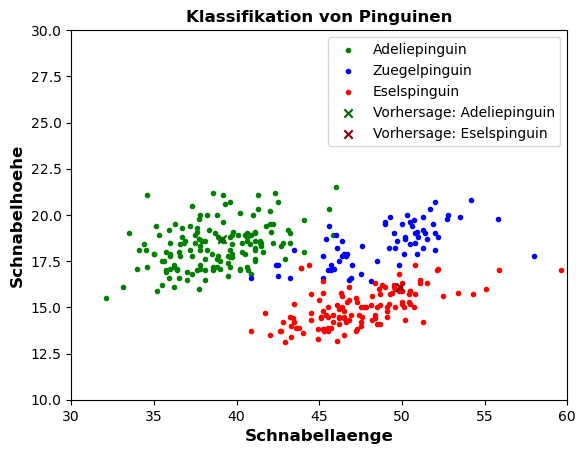

In [17]:
# Plot erstellen
species = ["Adeliepinguin", "Zuegelpinguin", "Eselspinguin"]
plt.title("Klassifikation von Pinguinen", size=12, fontweight='bold')
plt.xlabel(xLabel, size=12, fontweight='bold')
plt.ylabel(yLabel, size=12, fontweight='bold')

'''
# Loesung mit for-Schleife aus X und y
for i in range(0, len(y)):
    # Streudiagramm erstellen (Scatter)
    if y.iloc[i] == species[0]:
        plt.scatter(X[xLabel].iloc[i], X[yLabel].iloc[i], color='green',
        marker='.')
    elif y.iloc[i] == species[1]:
        plt.scatter(X[xLabel].iloc[i], X[yLabel].iloc[i], color='blue',
        marker='.')
    elif y.iloc[i] == species[2]:
        plt.scatter(X[xLabel].iloc[i], X[yLabel].iloc[i], color='red',
        marker='.')
'''

# Loesung ohne for-Schleife mit pandas
a = penguins[penguins[outcome] == species[0]][predictors] # Adelie
c = penguins[penguins[outcome] == species[1]][predictors] # Chinstrap
g = penguins[penguins[outcome] == species[2]][predictors] # Gentoo

# Streudiagramm erstellen (Scatter)
plt.scatter(a[xLabel], a[yLabel], color='green', marker='.', label=species[0])
plt.scatter(c[xLabel], c[yLabel], color='blue', marker='.', label=species[1])
plt.scatter(g[xLabel], g[yLabel], color='red', marker='.', label=species[2])

# Vorhersage ins Diagramm eintragen
plt.scatter(predAdelie[xLabel], predAdelie[yLabel], color='darkgreen',
marker='x', label='Vorhersage: Adeliepinguin')
plt.scatter(predGentoo[xLabel], predGentoo[yLabel], color='darkred',
marker='x', label='Vorhersage: Eselspinguin')

# Plot darstellen
plt.axis([30, 60, 10, 30])
plt.legend()
plt.show()

### Ende Aufgabe_04_2.ipynb ###

## Aufgabe 4 Teil 1: 

 a) Erklären Sie den *K-Nächsten-Nachbarn* (engl. K-Nearest Neighbors- KNN) Algorithmus.
 Welche Rolle spielt das *K* an dieser Stelle?

Die Idee hinter dem Algorithmus ist folgendes: 
1. Es werden *K* Beobachtungen gesucht, die ähnliche Merkmale besitzen (das heißt also ähnliche Werte hinsichtlich der Prädiktoren aufweisen)
2. Über eine Klassifikation wird herausgefunden, welche Kategorie unter den ähnlichen Beobachtungen mehrheitlich vorliegt. Die neue Beobachtung
wird dann der entsprechenden Kategorie zugeteilt.
3. Für die Vorhersage mittels Regression wird der durchschnittliche Wert unter diesen ähnlichen Beobachtungen ermittelt und damit der durchschnitt-
liche Wert für die neue Beobachtung vorhergesagt.

Das *K* ist dabei die **Anzahl der Nachbarn**, die bei der Ermittlung des nächsten Nachbarn berücksichtigt werden. Üblicherweise liegen die Werte für *K* zwischen 1 und 20. Es gibt dabei keine allgemeingültige Regel für ein optimales *K*: bei stark strukturierten und wenig verrauschten Daten funktionieren
kleinere *K* am besten. Bei verrauschten Daten mit weniger Struktur sind größere Werte von *K* angemessen. 

b) Was versteht man unter *Distanzmaß*? Welche *Distanzmaße* haben Sie bisher kennengelernt?

Ein *Distanzmaß* dient der Bestimmung von Ähnlichkeit (Nähe) und ist dabei eine Funktion, die die Entfernung zwischen zwei Datensätzen (x1, x2, x3, ...) und (u1, u2, u3, ...) misst. 

Die drei *Distanzmaße* sind von besonderer Relevanz:

- **Euklidische Distanz** / **euklidischer Abstand**: Hierfür wird ein Differenzvektor gebildet, anschließend werden die einzelnen Differenzen quadriert und die Ergebnisse summiert. Das Ergebnis ist dann die Quadratwurzel dieser Summe. Der Wert entspricht dem Abstand zwischen zwei Punkten, der sich ergibt, wenn man eine Gerade zwischen ihnen zieht ('Luftlinie').
- **Manhatten-Distanz**: Dies ist die Summe der horizontalen und vertikalen Abstände zwischen zwei Punkten auf einem Gitter, in denen geradlinige Bahnen entlang der x- und y-Achse zurückgelegt werden. Sie ist eine nützliche Näherung, wenn die Ähnlichkeit als Reisezeit von einem Ort zum anderen definiert wird.
- **Mahalanobis-Distanz**: Berücksichtigt bei numerischen Daten die Korrelation zwischen zwei Variablen. D.h. wenn zwei Variablen stark korrelieren, werden diese in Bezug auf den Abstand wie eine einzige Variable behandelt. Der Nachteil der Verwendung liegt in einem erhöhten Rechenaufwand und einer höheren Komplexität. 

 c) Erklären Sie den Begriff *Standardisierung* aus der mathematischen Statistik.

Wird auch *Normierung* oder (vor allem bei neuronalen Netzen) als *Normalisierung* bezeichnet. Im Zuge der *Standardisierung* werden alle Variablen gleich skaliert, indem der Mittelwert subtrahiert und durch die Standardabweichung dividiert wird. Dieser Vorgang stellt sicher, dass ein Modell nicht aufgrund des Maßstabes ihrer ursprünglichen Messung übermäßig beeinflusst wird. 

Das Ergebnis der Transformation wird *z-Wert* genannt. Die Messwerte werden dann als "Standardabweichungen vom Mittelwert" angegeben. 